### Importing important Libraries

In [ ]:
%pip install numpy 
%pip install pandas 
%pip install matplotlib
%pip install pandas-datareader
%pip install torch
%pip install tensorflow

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import pandas_datareader as web 
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from torch import inverse
from torch_optimizer import Optimizer

In [34]:
#  Selecting Cryptocurrency and currency comparater
crypto_currency = 'ADA'
against_currency = 'INR'

In [35]:
#  Setting time frame for the training data 

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [36]:
#  Loading Financial Data
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)

In [37]:
#  Preparing Data
scaler = MinMaxScaler(feature_range=(0,1)) # Scaling data between 0 and 1 to make it easy for nn to work
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [38]:
#  Preparing training Data
prediction_days = 60 # the number of days to predict the crypto on 
future_day = 30

x_train,y_train = [],[]

for x in range(prediction_days,len(scaled_data)):
# for x in range(prediction_days,len(scaled_data)-future_day):  # unlock for a specific day after
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    # y_train.append(scaled_data[x+future_day,0]) # unlock this too

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [39]:
# Create the neural network 
# pip install numpy == 1.19.5 
# use this command if there is a problem with numpy 

model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.20))
model.add(LSTM(units=50))
model.add(Dropout(0.20))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')


model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
47/47 [==============================] - 10s 68ms/step - loss: 0.0086 1
Epoch 2/25
47/47 [==============================] - 3s 71ms/step - loss: 0.0031
Epoch 3/25
47/47 [==============================] - 3s 72ms/step - loss: 0.0027
Epoch 4/25
47/47 [==============================] - 4s 80ms/step - loss: 0.0024
Epoch 5/25
47/47 [==============================] - 4s 79ms/step - loss: 0.0027
Epoch 6/25
47/47 [==============================] - 4s 74ms/step - loss: 0.0020
Epoch 7/25
47/47 [==============================] - 3s 72ms/step - loss: 0.0026
Epoch 8/25
47/47 [==============================] - 4s 80ms/step - loss: 0.0022
Epoch 9/25
47/47 [==============================] - 4s 76ms/step - loss: 0.0019
Epoch 10/25
47/47 [==============================] - 4s 76ms/step - loss: 0.0018: 0s - loss: 0
Epoch 11/25
47/47 [==============================] - 3s 71ms/step - loss: 0.0018
Epoch 12/25
47/47 [==============================] - 3s 73ms/step - loss: 0.0021: 1
Epoch 13/25
47/47

In [40]:
# Testing the model 

test_start = dt.datetime(2020,1,1) # (year.month,day)
# test_end = dt.datetime(2021,4,7) # this is for older testing 

test_end = dt.datetime.now()  # this should be used to do it for current trend


test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', test_start, test_end)


actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)



model_inputs = total_dataset[len(total_dataset)-len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [41]:
#  Prediction 

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

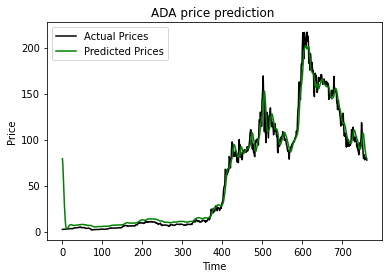

In [42]:
# plotting prediction v/s actual

plt.plot(actual_prices,color='black',label='Actual Prices')
plt.plot(prediction_prices,color='green',label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [43]:
# Predict next day 

# real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs)+1,0]]
real_data = [model_inputs[len(model_inputs) - prediction_days : len(model_inputs)+1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print('{} Price Tomorrow = {} {}'.format(crypto_currency,prediction[0,0],against_currency))

ADA Price Tomorrow = 79.20083618164062 INR
